# ASSIGNMENT 1 (adapted from https://bit.ly/2J7G9f8)

## PROBLEM:

### Context

Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people.

In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.

Submissions in this challenge will take the form of Python data analysis.

Kiva has provided a dataset of loans issued over the 2014-2018 time period, and participants are invited to use this data as well as source external public datasets to help Kiva build models for assessing borrower welfare levels. With a stronger understanding of their borrowers and their poverty levels, Kiva will be able to better assess and maximize the impact of their work.


### Problem statement

For the locations in which Kiva has active loans, the objective is to pair Kiva's data with additional data sources to estimate the welfare level of borrowers in specific regions, based on shared economic and demographic characteristics.

A good solution would connect the features of each loan or product to one of several poverty mapping datasets, which indicate the average level of welfare in a region on as granular a level as possible. Many datasets indicate the poverty rate in a given area, with varying levels of granularity. Kiva would like to be able to disaggregate these regional averages by gender, sector, or borrowing behavior in order to estimate a Kiva borrower’s level of welfare using all of the relevant information about them. Strong submissions will attempt to map vaguely described locations to more accurate geocodes.

### Personal disclaimer

From a research perspective, the results obtained are never going to be a full representation of the realities that borrowers experience. It is meant to spark a discussion around how we can identify the welfare level of borrowers and improve them where we can.

## SOLUTION:

### Python Packages & Functions

In [1]:
# Packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import re

### Data
*Here we upload all the Python packages and datasets required for analysis*

#### 1. Original Data

In [2]:
# Original Data
loan_data = pd.read_csv('C://Users//CT//Documents//data-science-for-good-kiva-crowdfunding//kiva_loans.csv')
location_data = pd.read_csv('C://Users//CT//Documents//data-science-for-good-kiva-crowdfunding//kiva_mpi_region_locations.csv')
loan_themes  = pd.read_csv('C://Users//CT//Documents//data-science-for-good-kiva-crowdfunding//loan_theme_ids.csv')
regional_lts = pd.read_csv('C://Users//CT//Documents//data-science-for-good-kiva-crowdfunding//loan_themes_by_region.csv')

print('loan_data shape:',loan_data.shape)
print('')
print('location_data shape:',location_data.shape)
print('')
print('loan_themes shape:',loan_themes.shape)
print('')
print('regional_lts shape:',regional_lts.shape)

loan_data shape: (671205, 20)

location_data shape: (2772, 9)

loan_themes shape: (779092, 4)

regional_lts shape: (15736, 21)


##### Descriptions of the original datasets

There are four data sources provided by Kiva:

* ***loan_data***
   1. **id** - Unique ID for loan
   2. **funded_amount** - The amount disbursed by Kiva to the field agent(USD)
   3. **loan_amount** - The amount disbursed by the field agent to the borrower(USD)
   4. **activity** - More granular category
   5. **sector** - High level category
   6. **use** - Exact usage of loan amount
   7. **country_code** - ISO country code of country in which loan was disbursed
   8. **country** - Full country name of country in which loan was disbursed
   9. **region** - Full region name within the country
   10. **currency** - The currency in which the loan was disbursed
   11. **partner_id** - ID of partner organization
   12. **posted_time** - The time at which the loan is posted on Kiva by the field agent
   13. **disbursed_time** - The time at which the loan is disbursed by the field agent to the borrower
   14. **funded_time** - The time at which the loan posted to Kiva gets funded by lenders completely
   15. **term_in_months** - The duration for which the loan was disbursed in months
   16. **lender_count** - The total number of lenders that contributed to this loan
   17. **tags**
   18. **borrower_genders** - Comma separated M,F letters, where each instance represents a single male/female in the group
   19. **repayment_interval**
   20. **date**
   
####  

* ***location_data***
   1. **LocationName** - region, country
   2. **ISO** - some sort of unique abbreviation for country   
   3. **country** - country   
   4. **region** - region within country   
   5. **world_region** - parts of the world   
   6. **MPI** - multidimensional poverty index   
   7. **geo** - (latitude, longitude)
   8. **lat** - latitude   
   9. **lon** - longitude
   
####  

* ***loan_themes***
   1. **id** - Unique ID for loan (Loan ID)   
   2. **Loan Theme ID** - ID for Loan Theme   
   3. **Loan Theme Type** - Category name of type of loan   
   4. **Partner ID**
   
####  

* ***regional_lts***
   1. **Partner ID**   
   2. **Field Partner Name**
   3. **sector**
   4. **Loan Theme ID**
   5. **Loan Theme Type**  
   6. **country**   
   7. **forkiva**   
   8. **region**
   9. **geocode_old**   
   10. **ISO**   
   11. **number**
   12. **amount**
   13. **LocationName**
   14. **geocode**
   15. **names**
   16. **geo**
   17. **lat**
   18. **lon**
   19. **mpi_region**
   20. **mpi_geo**
   21. **rural_pct**

In [3]:
print('SUMMARY STATISTICS WITHOUT AGGREGATION: loan_data')
summary1 = loan_data.describe()

# drop irrelevant columns
summary1 = summary1.drop(['id','partner_id'],1)

# display appropriate summary
summary1

SUMMARY STATISTICS WITHOUT AGGREGATION: loan_data


,funded_amount,loan_amount,term_in_months,lender_count
count,671205.000000,671205.000000,671205.000000,671205.000000
mean,785.995061,842.397107,13.739022,20.590922
std,1130.398941,1198.660073,8.598919,28.459551
min,0.000000,25.000000,1.000000,0.000000
25%,250.000000,275.000000,8.000000,7.000000
50%,450.000000,500.000000,13.000000,13.000000
75%,900.000000,1000.000000,14.000000,24.000000
max,100000.000000,100000.000000,158.000000,2986.000000


In [4]:
print('SUMMARY STATISTICS WITHOUT AGGREGATION: location_data')
summary2 = location_data.describe()

# drop irrelevant columns
summary2 = summary2.drop(['lat','lon'],1)

# display appropriate summary
summary2

SUMMARY STATISTICS WITHOUT AGGREGATION: location_data


,MPI
count,984.000000
mean,0.211330
std,0.183621
min,0.000000
25%,0.053000
50%,0.155000
75%,0.341500
max,0.744000


In [5]:
print('SUMMARY STATISTICS WITHOUT AGGREGATION: regional_lts')
summary3 = regional_lts.describe()

# drop irrelevant columns
summary3 = summary3.drop(['Partner ID','lat','lon'],1)

# display appropriate summary
summary3

SUMMARY STATISTICS WITHOUT AGGREGATION: regional_lts


,number,amount,rural_pct
count,15736.000000,1.573600e+04,14344.000000
mean,53.628432,2.003991e+04,68.084635
std,403.079799,9.636941e+04,26.550064
min,1.000000,2.500000e+01,0.000000
25%,1.000000,9.500000e+02,60.000000
50%,4.000000,2.600000e+03,73.000000
75%,15.000000,8.750000e+03,85.000000
max,22538.000000,4.929900e+06,100.000000


#### 2. Supplementary Data

In this section, we aim to gather the following data from the World Bank:

1. [Per Capita Expenditure (PCE)](https://www.quora.com/What-does-per-capita-expenditure-mean?share=1) for each country - *this is the total market value of all purchases in a country divided by that country's total population* (data: https://bit.ly/3blw0be)
2. [Multidimensional poverty headcount ratio](https://duckduckgo.com/?t=ffab&q=headcount+ratio+meaning&ia=web) - *this is the proportion of a country's population that lives, below the poverty line.* (data: https://bit.ly/2VfM2hi)
3. [GDP per capita (2011 PPP)](http://hdr.undp.org/en/content/gdp-per-capita-2011-ppp) for each country - *this is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products, expressed in international dollars using purchasing power parity rates and divided by total population of the same period.*

In [6]:
# Per Capita Expenditure
PCE_data = pd.read_html('C://Users//CT//Documents//data-science-for-good-kiva-crowdfunding//PCE data.html')
PCE_data = PCE_data[0]
PCE_data = pd.DataFrame(PCE_data)

# World Bank Gross data
db_data = pd.read_csv('C://Users//CT//Documents//data-science-for-good-kiva-crowdfunding//Data_Extract_From_Poverty_and_Equity//806b9aec-08c0-45f0-8acc-e02a84ec7c9c_Data.csv')

print('PCE_data shape:',PCE_data.shape)
print('')
print('db_data shape:',db_data.shape)
print(db_data.iloc[:,0].unique())

PCE_data shape: (185, 61)

db_data shape: (560, 50)
['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'
 'Poverty headcount ratio at national poverty lines (% of population)'
 'Survey mean consumption or income per capita, total population (2011 PPP $ per day)'
 nan 'Data from database: Poverty and Equity' 'Last Updated: 03/18/2020']


### Exploratory Data Analysis

#### The impact of KIVA donors

In this section, we seek to explore the data to answer certain questions around KIVA donor contributions

##### 1. How much of the total loan amount has Kiva financed?

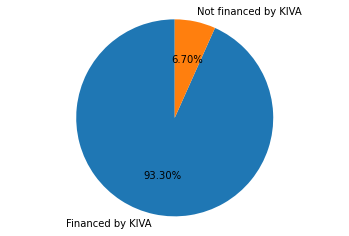

In [7]:
# calculate the percentage of loan requests that have been funded
percentage1 = (loan_data.funded_amount.sum()/loan_data.loan_amount.sum())*100
percentage1 = round(percentage1, 2)

# display the result
status = ['Financed by KIVA','Not financed by KIVA']
values = [percentage1, (100-percentage1)]

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=status,
        autopct='%1.2f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

##### 2. How much money have Kiva donors contributed over time?

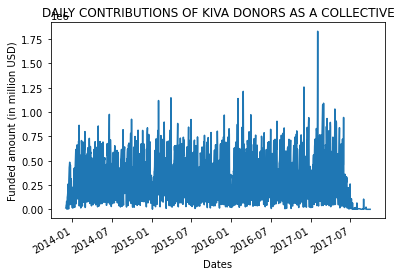

In [8]:
# convert datetime values to appropriate formats
loan_data['posted_time'] = loan_data['posted_time'].astype('datetime64')
loan_data['disbursed_time'] = loan_data['disbursed_time'].astype('datetime64')
loan_data['funded_time'] = loan_data['funded_time'].astype('datetime64')

# pick out dates
loan_data.loc[:,'disbursement_date'] = loan_data['disbursed_time'].dt.date

# create a pivot-table
tab1 = pd.pivot_table(loan_data, values='funded_amount', index=['disbursement_date'], aggfunc='sum')

# plot this table
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ax = plt.subplots()
ax.plot(tab1.index, tab1['funded_amount'])

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# declare the title and show the completed graph
plt.xlabel('Dates')
plt.ylabel('Funded amount (in million USD)')
ax.set_title('DAILY CONTRIBUTIONS OF KIVA DONORS AS A COLLECTIVE')
plt.show()

##### 3. How much money have Kiva donors given to individual loans?

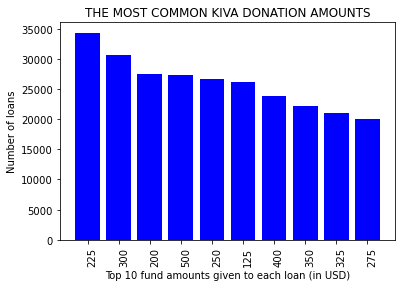

In [9]:
# create a pivot-table
loan_count_per_funded_amount = pd.pivot_table(loan_data, values='id', index=['funded_amount'], aggfunc='count')

# rename the column
loan_count_per_funded_amount.columns = ['number_of_loans']

# sort the results in descending order
loan_count_per_funded_amount = loan_count_per_funded_amount.sort_values(by=['number_of_loans'], ascending=False)

# and display top 10 results
amounts = ['225','300','200','500','250','125','400','350','325','275']
fig, ax = plt.subplots()
ax.bar(amounts,loan_count_per_funded_amount.iloc[0:10,0],color='blue')
plt.ylabel('Number of loans')
ax.set_xticklabels(labels=amounts, rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Top 10 fund amounts given to each loan (in USD)')
plt.title('THE MOST COMMON KIVA DONATION AMOUNTS')
plt.show()

##### 4. How much money have Kiva donors given to individual countries?

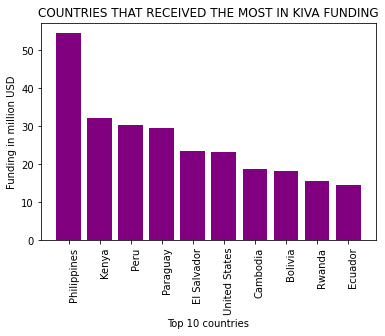

In [10]:
# create a pivot-table
tab2 = pd.pivot_table(loan_data, values='funded_amount', index=['country'], aggfunc='sum')

# sort the results in descending order
tab2 = tab2.sort_values(by=['funded_amount'], ascending=False)

# rename the aggregated column to an appropiate label
tab2.columns = ['sum_of_funded_amount']

# make some index entries into columns
tab2 = tab2.reset_index(level=['country'])

# and display top 10 results
fig, ax = plt.subplots()
ax.bar(tab2.iloc[0:10,0],(tab2.iloc[0:10,1]/1000000),color='purple')
plt.ylabel('Funding in million USD')
ax.set_xticklabels(labels=tab2.iloc[0:10,0], rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Top 10 countries')
plt.title('COUNTRIES THAT RECEIVED THE MOST IN KIVA FUNDING')
plt.show()

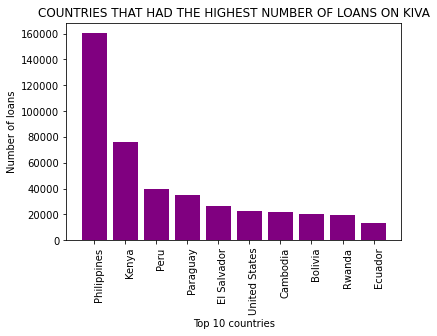

In [11]:
# create a pivot-table
loans_per_country = pd.pivot_table(loan_data, values='id', index=['country'], aggfunc='count')

# sort the results in descending order
loans_per_country = loans_per_country.sort_values(by=['id'], ascending=False)

# rename the aggregated column to an appropiate label
loans_per_country.columns = ['number_of_loans']

# make some index entries into columns
loans_per_country = loans_per_country.reset_index(level=['country'])

# and display top 10 results
loans_per_country.head(10)

# and display top 10 results
fig, ax = plt.subplots()
ax.bar(loans_per_country.iloc[0:10,0],loans_per_country.iloc[0:10,1],color='purple')
plt.ylabel('Number of loans')
ax.set_xticklabels(labels=tab2.iloc[0:10,0], rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Top 10 countries')
plt.title('COUNTRIES THAT HAD THE HIGHEST NUMBER OF LOANS ON KIVA')
plt.show()

This shows that the top 10 countries in terms of the number of loans and amount of funding from KIVA were the same and each country maintained its position.

Countries that had the highest contribution per loan were:

In [12]:
# initial status message
print('The shape of tab2 before merge: ', tab2.shape)

# join the data, keeping only relevant entries
tab2 = tab2.merge(loans_per_country, on='country')

# final status message
print('The shape of tab2 after merge: ', tab2.shape)

The shape of tab2 before merge:  (87, 2)
The shape of tab2 after merge:  (87, 3)


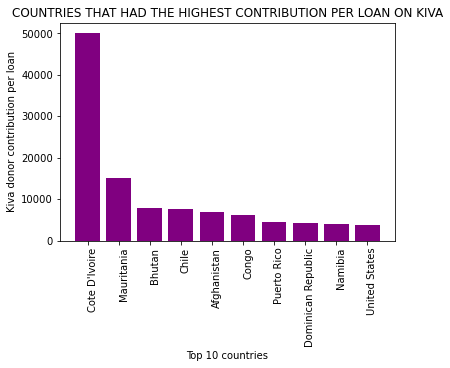

In [13]:
# add a calculated column to the newly merged tab2
tab2.loc[:, 'contribution_per_loan'] = tab2['sum_of_funded_amount']/tab2['number_of_loans']

# sort the results in descending order
tab2 = tab2.sort_values(by=['contribution_per_loan'], ascending=False)

# and display top 10 results
fig, ax = plt.subplots()
ax.bar(tab2.iloc[0:10,0], round(tab2.iloc[0:10,3], 2), color='purple')
plt.ylabel('Kiva donor contribution per loan')
ax.set_xticklabels(labels=tab2.iloc[0:10,0], rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Top 10 countries')
plt.title('COUNTRIES THAT HAD THE HIGHEST CONTRIBUTION PER LOAN ON KIVA')
plt.show()

Countries that had the lowest contribution per loan were:

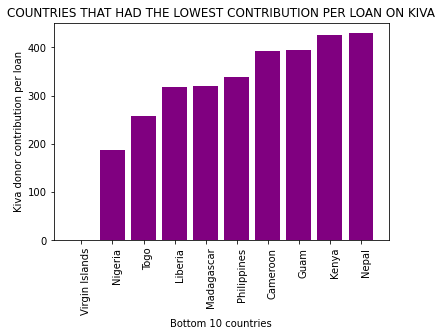

In [14]:
# add a calculated column to the newly merged tab2
tab2.loc[:, 'contribution_per_loan'] = tab2['sum_of_funded_amount']/tab2['number_of_loans']

# sort the results in descending order
tab2 = tab2.sort_values(by=['contribution_per_loan'], ascending=True)

# and display top 10 results
fig, ax = plt.subplots()
ax.bar(tab2.iloc[0:10,0], round(tab2.iloc[0:10,3], 2), color='purple')
plt.ylabel('Kiva donor contribution per loan')
ax.set_xticklabels(labels=tab2.iloc[0:10,0], rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Bottom 10 countries')
plt.title('COUNTRIES THAT HAD THE LOWEST CONTRIBUTION PER LOAN ON KIVA')
plt.show()

##### 5. What is the geographical footprint of where funds given by KIVA donors end up?

In [15]:
# make a copy of the loan_data dataset and combine it with partner data
loan_data_copy = loan_data.copy()

# ensure that the common column is the same datatype and they share the same name
# the datatype chosen was float64 to preserve any decimal points
print(loan_data_copy.iloc[:,10].name) # original name; stays the same
print('')

print(regional_lts.iloc[:,0].name) #original name - will be changed
#change column name
regional_lts.columns = ['partner_id', 'Field Partner Name', 'sector',
                        'Loan Theme ID', 'Loan Theme Type', 'country',
                        'forkiva', 'region', 'geocode_old',
                        'ISO', 'number', 'amount',
                        'LocationName', 'geocode', 'names',
                        'geo', 'lat', 'lon',
                        'mpi_region', 'mpi_geo', 'rural_pct']
# confirm change
print(regional_lts.iloc[:,0].name)

# change the datatype
regional_lts.iloc[:,0] = regional_lts.iloc[:,0].astype('float64')

partner_id

Partner ID
partner_id


In [16]:
# create a pivot-table
tab3 = pd.pivot_table(loan_data_copy, values='funded_amount', index=['partner_id'], aggfunc='sum')

# sort the results in descending order
tab3 = tab3.sort_values(by=['funded_amount'], ascending=False)

# rename the aggregated column to an appropiate label
tab3.columns = ['sum_of_funded_amount']

# make some index entries into columns
tab3 = tab3.reset_index(level=['partner_id'])


# create another pivot-table
tab4 = pd.pivot_table(regional_lts, values='amount',
                      index=['partner_id', 'Field Partner Name',
                             'country'],
                      aggfunc='count')

# sort the results in descending order
tab4 = tab4.sort_values(by=['amount'], ascending=False)

# rename the aggregated column to an appropiate label
tab4.columns = ['count_of_amount']

# make some index entries into columns
tab4 = tab4.reset_index(level=['partner_id', 'Field Partner Name', 'country'])


# create a third pivot-table
tab5 = pd.pivot_table(loan_data_copy, values='id', index=['partner_id'], aggfunc='count')

# sort the results in descending order
tab5 = tab5.sort_values(by=['id'], ascending=False)

# rename the aggregated column to an appropiate label
tab5.columns = ['number_of_loans']

# make some index entries into columns
tab5 = tab5.reset_index(level=['partner_id'])


# initial status message
print('The shape of tab3 before merge: ', tab3.shape)

# join the data, keeping only relevant entries
tab3 = tab3.merge(tab5, on='partner_id')

# final status message
print('The shape of tab3 after merge: ', tab3.shape)


# initial status message
print('The shape of tab3 before merge: ', tab3.shape)

# join the data, keeping only relevant entries
tab3 = tab3.merge(tab4, on='partner_id')

# final status message
print('The shape of tab3 after merge: ', tab3.shape)


percentage2 = tab3.shape[0]/366 * 100
percentage2 = round(percentage2, 0)

print('Out of the 366 partners that disbursed loans, KIVA had the contact details of '+str(percentage2)+'% of them.')

The shape of tab3 before merge:  (366, 2)
The shape of tab3 after merge:  (366, 3)
The shape of tab3 before merge:  (366, 3)
The shape of tab3 after merge:  (331, 6)
Out of the 366 partners that disbursed loans, KIVA had the contact details of 90.0% of them.


The partners that received the most funding by KIVA were:

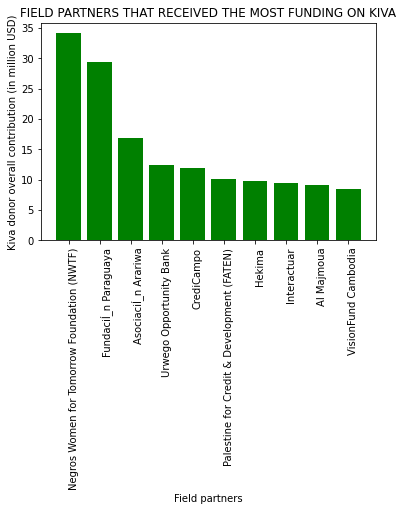

In [17]:
# to have more details of the partners that received the most funding by KIVA,
# sort the results in descending order
tab3 = tab3.sort_values(by=['sum_of_funded_amount'], ascending=False)

# drop the unecessary columns
tab3 = tab3.drop('count_of_amount',1)

# display top 10 results; do they match with the original tab3? They match!
fig, ax = plt.subplots()
ax.bar(tab3.iloc[0:10,3], (tab3.iloc[0:10,1]/1000000), color='green')
plt.ylabel('Kiva donor overall contribution (in million USD)')
ax.set_xticklabels(labels=tab3.iloc[0:10,3], rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Field partners')
plt.title('FIELD PARTNERS THAT RECEIVED THE MOST FUNDING ON KIVA')
plt.show()

The partners that serviced the highest number of loans on KIVA were:

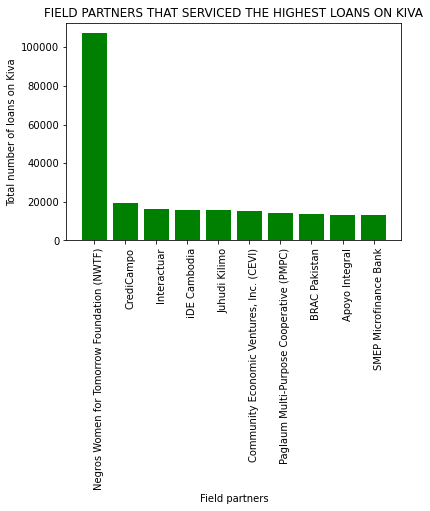

In [18]:
# sort the results in descending order
tab3 = tab3.sort_values(by=['number_of_loans'], ascending=False)

# display top 10 results in terms of number of loans
fig, ax = plt.subplots()
ax.bar(tab3.iloc[0:10,3], tab3.iloc[0:10,2], color='green')
plt.ylabel('Total number of loans on Kiva')
ax.set_xticklabels(labels=tab3.iloc[0:10,3], rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Field partners')
plt.title('FIELD PARTNERS THAT SERVICED THE HIGHEST LOANS ON KIVA')
plt.show()

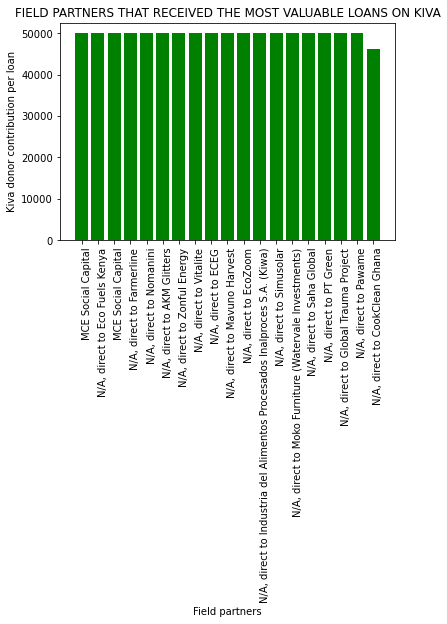

In [19]:
# add a calculated column to the newly merged tab3
tab3.loc[:, 'contribution_per_loan'] = tab3['sum_of_funded_amount']/tab3['number_of_loans']

# sort the results in descending order
tab3 = tab3.sort_values(by=['contribution_per_loan'], ascending=False)

# display top 20 results in terms of donor contribution per loan
fig, ax = plt.subplots()
ax.bar(tab3.iloc[0:20,3], tab3.iloc[0:20,5], color='green')
plt.ylabel('Kiva donor contribution per loan')
ax.set_xticklabels(labels=tab3.iloc[0:20,3], rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Field partners')
plt.title('FIELD PARTNERS THAT RECEIVED THE MOST VALUABLE LOANS ON KIVA')
plt.show()

The per capita contribution shows most of the largest contributions per loan actually went directly to social impact businesses.

#### The characteristics of KIVA borrowers

In this section, we seek to understand KIVA borrower characteristics.

##### 1. What is the size of the shortfall for each individual borrower in a given sector?

In [20]:
# create a pivot-table
tab6 = pd.pivot_table(loan_data_copy, values='funded_amount', index=['sector'], aggfunc='sum')

# sort the results in descending order
tab6 = tab6.sort_values(by=['funded_amount'], ascending=False)

# rename the aggregated column to an appropiate label
tab6.columns = ['sum_of_funded_amount']

# make some index entries into columns
tab6 = tab6.reset_index(level=['sector'])


# create another pivot-table
loans_by_sector = pd.pivot_table(loan_data_copy, values='id', index=['sector'], aggfunc='count')

# sort the results in descending order
loans_by_sector = loans_by_sector.sort_values(by=['id'], ascending=False)

# rename the aggregated column to an appropiate label
loans_by_sector.columns = ['number_of_loans']

# make some index entries into columns
loans_by_sector = loans_by_sector.reset_index(level=['sector'])


# create a third pivot-table
loan_amounts_by_sector = pd.pivot_table(loan_data_copy, values='loan_amount', index=['sector'], aggfunc='sum')

# sort the results in descending order
loan_amounts_by_sector = loan_amounts_by_sector.sort_values(by=['loan_amount'], ascending=False)

# rename the aggregated column to an appropiate label
loan_amounts_by_sector.columns = ['sum_of_loan_amount']

# make some index entries into columns
loan_amounts_by_sector = loan_amounts_by_sector.reset_index(level=['sector'])


# initial status message
print('The shape of tab6 before merge: ', tab6.shape)

# join the data, keeping only relevant entries
tab6 = tab6.merge(loans_by_sector, on='sector')

# final status message
print('The shape of tab6 after merge: ', tab6.shape)


# initial status message
print('The shape of tab6 before merge: ', tab6.shape)

# join the data, keeping only relevant entries
tab6 = tab6.merge(loan_amounts_by_sector, on='sector')

# final status message
print('The shape of tab6 after merge: ', tab6.shape)

The shape of tab6 before merge:  (15, 2)
The shape of tab6 after merge:  (15, 3)
The shape of tab6 before merge:  (15, 3)
The shape of tab6 after merge:  (15, 4)


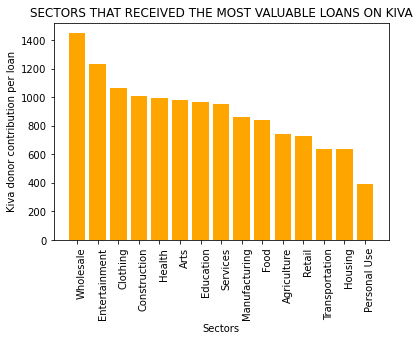

In [21]:
# assess additional metrics
tab6.loc[:, 'donor_contribution_per_loan'] = tab6['sum_of_funded_amount']/tab6['number_of_loans']
tab6.loc[:, 'funding_gap_per_loan'] = (-tab6['sum_of_loan_amount']+tab6['sum_of_funded_amount'])/tab6['number_of_loans']

# sort the results in descending order
tab6 = tab6.sort_values(by=['donor_contribution_per_loan'], ascending=False)

# display all results
fig, ax = plt.subplots()
ax.bar(tab6.iloc[:,0], tab6.iloc[:,4], color='orange')
plt.ylabel('Kiva donor contribution per loan')
ax.set_xticklabels(labels=tab6.iloc[:,0], rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Sectors')
plt.title('SECTORS THAT RECEIVED THE MOST VALUABLE LOANS ON KIVA')
plt.show()

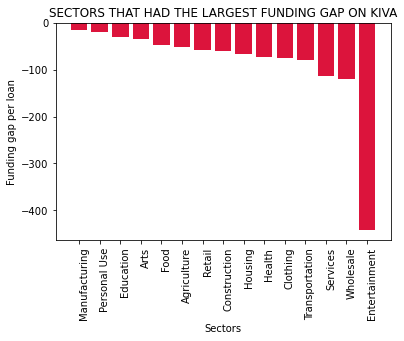

In [22]:
# sort the results in descending order
tab6 = tab6.sort_values(by=['funding_gap_per_loan'], ascending=False)

# display all results
fig, ax = plt.subplots()
ax.bar(tab6.iloc[:,0], tab6.iloc[:,5], color='crimson')
plt.ylabel('Funding gap per loan')
ax.set_xticklabels(labels=tab6.iloc[:,0], rotation = (90), fontsize = 10, va='top', ha='left')
plt.xlabel('Sectors')
plt.title('SECTORS THAT HAD THE LARGEST FUNDING GAP ON KIVA')
plt.show()

It appears that the Entertainment sector has the highest funding gap and Manufacturing has the lowest funding gap.

##### 2. How were loans and funding distributed across the genders?

In [23]:
# count frequency of female and male to identify number of borrowers
loan_data_copy.loc[:, 'number_of_all_borrowers'] = loan_data_copy['borrower_genders'].str.count('male') # counts both instances of female and male - they share the 'male' element
loan_data_copy.loc[:, 'number_of_female_borrowers'] = loan_data_copy['borrower_genders'].str.count('female')
loan_data_copy.loc[:, 'number_of_male_borrowers'] = loan_data_copy['number_of_all_borrowers'] - loan_data_copy['number_of_female_borrowers']


print('We had borrower data on',
      round(loan_data_copy['number_of_all_borrowers'].count()/loan_data_copy.shape[0]*100, 2),
      '% of the loans recorded')

We had borrower data on 99.37 % of the loans recorded


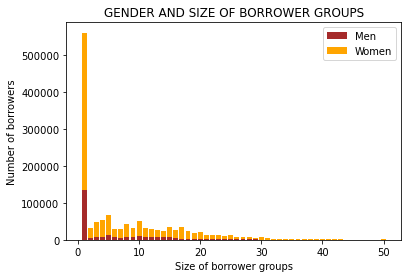

In [24]:
# create a pivot-table
borrower_group_data = pd.pivot_table(loan_data_copy, values=['number_of_male_borrowers', 'number_of_female_borrowers'],
                                     index=['number_of_all_borrowers'],aggfunc='sum')
#N/B: Using the count gives the total number of loans with borrower data; we need the sum to see the gender distribution across group size

# make some index entries into columns
borrower_group_data = borrower_group_data.reset_index(level=['number_of_all_borrowers'])


# display the results
fig, ax = plt.subplots()

ax.bar(borrower_group_data.iloc[:,0], borrower_group_data.iloc[:,2], label='Men', color='brown')
ax.bar(borrower_group_data.iloc[:,0], borrower_group_data.iloc[:,1],
       bottom=borrower_group_data.iloc[:,2], label='Women', color='orange')

ax.set_ylabel('Number of borrowers')
ax.set_xlabel('Size of borrower groups')
ax.set_title('GENDER AND SIZE OF BORROWER GROUPS')
ax.legend()
plt.show()

The graph above shows that most people preferred to borrow as individuals; however, there were substantially larger numbers of women in each group size compared to men.

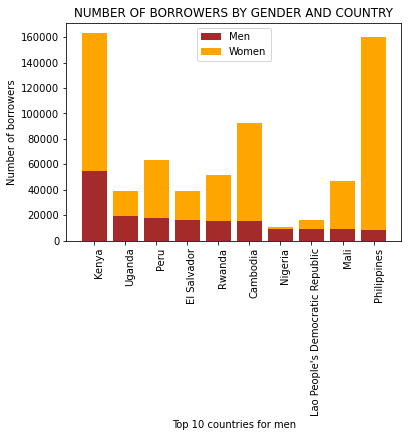

In [25]:
# create a pivot-table
borrower_country_data = pd.pivot_table(loan_data_copy, values=['number_of_male_borrowers', 'number_of_female_borrowers'],
                                       index=['country'],aggfunc='sum')


# sort the male results in descending order
borrower_country_data = borrower_country_data.sort_values(by=['number_of_male_borrowers'], ascending=False)

# make some index entries into columns
borrower_country_data = borrower_country_data.reset_index(level=['country'])


# display the results
fig, ax = plt.subplots()

ax.bar(borrower_country_data.iloc[0:10,0], borrower_country_data.iloc[0:10,2], label='Men', color='brown')
ax.bar(borrower_country_data.iloc[0:10,0], borrower_country_data.iloc[0:10,1],
       bottom=borrower_country_data.iloc[0:10,2], label='Women', color='orange')

ax.set_xticklabels(labels=borrower_country_data.iloc[0:10,0], rotation = (90), fontsize = 10, va='top', ha='left')
ax.set_ylabel('Number of borrowers')
ax.set_xlabel('Top 10 countries for men')
ax.set_title('NUMBER OF BORROWERS BY GENDER AND COUNTRY')
ax.legend()
plt.show()

The country with the highest number of male borrowers was Kenya, while the country where men formed the majority of KIVA borrowers was Nigeria.

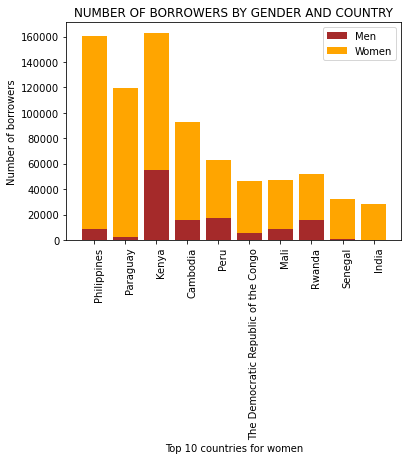

In [26]:
# sort the female results in descending order
borrower_country_data = borrower_country_data.sort_values(by=['number_of_female_borrowers'], ascending=False)

# display the results
fig, ax = plt.subplots()

ax.bar(borrower_country_data.iloc[0:10,0], borrower_country_data.iloc[0:10,2], label='Men', color='brown')
ax.bar(borrower_country_data.iloc[0:10,0], borrower_country_data.iloc[0:10,1],
       bottom=borrower_country_data.iloc[0:10,2], label='Women', color='orange')

ax.set_xticklabels(labels=borrower_country_data.iloc[0:10,0], rotation = (90), fontsize = 10, va='top', ha='left')
ax.set_ylabel('Number of borrowers')
ax.set_xlabel('Top 10 countries for women')
ax.set_title('NUMBER OF BORROWERS BY GENDER AND COUNTRY')
ax.legend()
plt.show()

The country with the highest number of female borrowers was the Philippines, it can also be observed that nearly all borrowers were women in Paraguay and Senegal, while India appears to consist of only female borrowers.

In [27]:
# create a pivot-table
tab7 = pd.pivot_table(loan_data_copy, values=['term_in_months', 'number_of_all_borrowers', 'number_of_male_borrowers', 'number_of_female_borrowers', 'loan_amount', 'funded_amount'], index=['repayment_interval'], aggfunc='sum')

# sort the results in descending order
tab7 = tab7.sort_values(by=['number_of_all_borrowers'], ascending=False)

# make some index entries into columns
tab7 = tab7.reset_index(level=['repayment_interval'])


# create another pivot-table
loan_repayment = pd.pivot_table(loan_data_copy, values='id', index=['repayment_interval'], aggfunc='count')

# sort the results in descending order
loan_repayment = loan_repayment.sort_values(by=['id'], ascending=False)

# rename the aggregated column to an appropiate label
loan_repayment.columns = ['number_of_loans']

# make some index entries into columns
loan_repayment = loan_repayment.reset_index(level=['repayment_interval'])


# initial status message
print('The shape of tab7 before merge: ', tab7.shape)

# join the data, keeping only relevant entries
tab7 = tab7.merge(loan_repayment, on='repayment_interval')

# final status message
print('The shape of tab7 after merge: ', tab7.shape)

# present findings in more digestible formats
tab7.loc[:, 'female_pct_of_total_borrowers'] = round((tab7['number_of_female_borrowers']/tab7['number_of_all_borrowers'])*100, 2)
tab7.loc[:, 'male_pct_of_total_borrowers'] = round((tab7['number_of_male_borrowers']/tab7['number_of_all_borrowers'])*100, 2)
tab7.loc[:, 'million_USD_female_total_funding'] = round((tab7['female_pct_of_total_borrowers']/100*tab7['funded_amount'])/1000000, 2)
tab7.loc[:, 'million_USD_male_total_funding'] = round((tab7['male_pct_of_total_borrowers']/100*tab7['funded_amount'])/1000000, 2)
tab7.loc[:, 'million_USD_female_total_loan_amount'] = round((tab7['female_pct_of_total_borrowers']/100*tab7['loan_amount'])/1000000, 2)
tab7.loc[:, 'million_USD_male_total_loan_amount'] = round((tab7['male_pct_of_total_borrowers']/100*tab7['loan_amount'])/1000000, 2)
tab7.loc[:, 'million_female_funding_gap'] = -tab7['million_USD_female_total_loan_amount']+tab7['million_USD_female_total_funding']
tab7.loc[:, 'million_male_funding_gap'] = -tab7['million_USD_male_total_loan_amount']+tab7['million_USD_male_total_funding']

# drop raw data columns
tab7 = tab7.drop(['funded_amount', 'loan_amount',
                  'number_of_all_borrowers', 'number_of_female_borrowers',
                  'number_of_male_borrowers'],1)

The shape of tab7 before merge:  (4, 7)
The shape of tab7 after merge:  (4, 8)


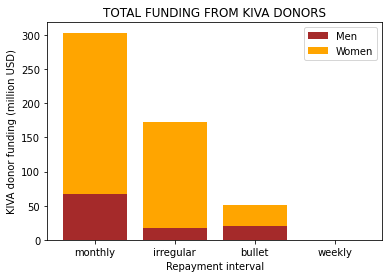

In [28]:
# display summary of funding by gender
fig, ax = plt.subplots()

ax.bar(tab7.iloc[:,0], tab7.iloc[:,6], label='Men', color='brown')
ax.bar(tab7.iloc[:,0], tab7.iloc[:,5], bottom=tab7.iloc[:,6], label='Women', color='orange')

ax.set_ylabel('KIVA donor funding (million USD)')
ax.set_xlabel('Repayment interval')
ax.set_title('TOTAL FUNDING FROM KIVA DONORS')
ax.legend()

plt.show()

The above graph indicates that women are getting much more funding than men, and a significant amount of data on repayment behaviour is missing (missing data is represented as the 'bullet group').

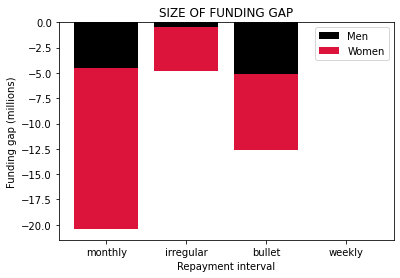

In [29]:
# display summary of the funding gap by gender
fig, ax = plt.subplots()

ax.bar(tab7.iloc[:,0], tab7.iloc[:,10], label='Men', color='black')
ax.bar(tab7.iloc[:,0], tab7.iloc[:,9], bottom=tab7.iloc[:,10], label='Women', color='crimson')

ax.set_ylabel('Funding gap (millions)')
ax.set_xlabel('Repayment interval')
ax.set_title('SIZE OF FUNDING GAP')
ax.legend()
plt.show()

The graph above indicates that in as much as women are getting much more funding than men, those in the monthly repayment group still have a significant funding gap. Furthermore, the second-largest funding gap was not from those people belonging to the irregular payments group, but those belonging to the group that had missing data on payment behaviour. This makes sense because there may be a lack of trust that makes KIVA donors not foot the entire loan of those with missing repayment plans.

#### Global welfare

In this section, we seek to explore the data to understand the financial well-being of various countries with the aid of an external dataset

What percentage of their monthly expenditure does the average citizen devote to loan repayments?

In [30]:
# Made a copy of the data: 
expenditure = PCE_data.copy()

# Reference rows:
print('')
print(expenditure.iloc[0,0])
print(expenditure.iloc[18,0])
print(expenditure.iloc[49,0])
print(expenditure.iloc[76,0])
print(expenditure.iloc[87,0])
print(expenditure.iloc[132,0])
print(expenditure.iloc[140,0])

# Make a regional column for the data
expenditure.loc[:, 'region'] = 0
expenditure['region'].iloc[1:18] = 'East Asia and Pacific'
expenditure['region'].iloc[19:49] = 'Europe and Central Asia'
expenditure['region'].iloc[50:76] = 'Latin America and the Caribbean'
expenditure['region'].iloc[77:87] = 'Middle East and North Africa'
expenditure['region'].iloc[88:132] = 'Other High Income'
expenditure['region'].iloc[133:140] = 'South Asia'
expenditure['region'].iloc[141:186] = 'Sub-Saharan Africa'

# Delete header rows
expenditure = expenditure.drop(labels=[0,18,49,76,87,132,140], axis=0)

print('')
print(expenditure.iloc[0,0]) # should not have East Asia and Pacific
print(expenditure.iloc[18,0]) # should not have Europe and Central Asia
print(expenditure.iloc[49,0]) # should not have Latin America and the Caribbean
print(expenditure.iloc[76,0]) # should not have Middle East and North Africa
print(expenditure.iloc[87,0]) # should not have Other high Income
print(expenditure.iloc[132,0]) # should not have South Asia
print(expenditure.iloc[140,0]) # should not have Sub-Saharan Africa

print('')
print(expenditure.shape)

# Convert any 'n/a' strings to NaN values
expenditure = expenditure.replace('n/a', np.nan)

# Convert any numeric data stored as a string into a decimal
print('')
print(expenditure.dtypes)

expenditure['1960'] = expenditure['1960'].astype('float64')
expenditure['1961'] = expenditure['1961'].astype('float64')
expenditure['1962'] = expenditure['1962'].astype('float64')
expenditure['1963'] = expenditure['1963'].astype('float64')
expenditure['1964'] = expenditure['1964'].astype('float64')
expenditure['1965'] = expenditure['1965'].astype('float64')
expenditure['1966'] = expenditure['1966'].astype('float64')
expenditure['1967'] = expenditure['1967'].astype('float64')
expenditure['1968'] = expenditure['1968'].astype('float64')

print('')
print(expenditure.dtypes)



East Asia and Pacific
Europe and Central Asia
Latin America and the Caribbean
Middle East and North Africa
Other high Income
South Asia
Sub-Saharan Africa

American Samoa
Armenia
Belize
Iraq
Bahrain
Pakistan
Cameroon

(178, 62)

Unnamed: 0      object
1960            object
1961            object
1962            object
1963            object
                ...   
2016           float64
2017           float64
2018           float64
Unnamed: 60    float64
region          object
Length: 62, dtype: object

Unnamed: 0      object
1960           float64
1961           float64
1962           float64
1963           float64
                ...   
2016           float64
2017           float64
2018           float64
Unnamed: 60    float64
region          object
Length: 62, dtype: object


C:\Users\CT\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
YearlyExpenditure = expenditure.loc[:,'2014':'2017']

MonthlyExpenditure = YearlyExpenditure/12

MonthlyExpenditure.loc[:,'country'] = expenditure['Unnamed: 0']
MonthlyExpenditure.loc[:,'region'] = expenditure['region']

In [32]:
MonthlyExpenditure

,2014,2015,2016,2017,country,region
1,586.271667,584.475000,591.529167,592.816667,American Samoa,East Asia and Pacific
2,63.661667,66.361667,69.737500,71.814167,Cambodia,East Asia and Pacific
3,195.698333,210.718333,227.022500,241.104167,China,East Asia and Pacific
4,170.690000,176.700000,183.363333,190.253333,Indonesia,East Asia and Pacific
5,86.854167,89.400833,92.022500,NaN,Lao People's Democratic Republic,East Asia and Pacific
...,...,...,...,...,...,...
180,42.224167,43.976667,43.604167,43.282500,Tanzania,Sub-Saharan Africa
181,61.095833,62.172500,62.811667,61.915833,Togo,Sub-Saharan Africa
182,40.890833,43.901667,42.322500,42.041667,Uganda,Sub-Saharan Africa
183,NaN,NaN,NaN,NaN,Zambia,Sub-Saharan Africa


In [33]:
# get the monthly repayment on each loan
loan_data_copy.loc[:, 'monthly_loan_repayment'] = loan_data_copy['loan_amount']/loan_data_copy['term_in_months']

# get the year that the loan was issued
loan_data_copy.loc[:,'disbursement_year'] = loan_data['disbursed_time'].dt.year

# create a pivot-table
tab8 = pd.pivot_table(loan_data_copy, values=['monthly_loan_repayment'], columns='disbursement_year', index=['country'], aggfunc='mean')

# drop level and rename columns
tab8 = tab8.droplevel('disbursement_year', axis=1)
tab8.columns = ['monthly_loan_repayment 2013', 'monthly_loan_repayment 2014',
                'monthly_loan_repayment 2015', 'monthly_loan_repayment 2016',
                'monthly_loan_repayment 2017']

# make some index entries into columns
tab8 = tab8.reset_index(level=['country'])

# and display all results
tab8

,country,monthly_loan_repayment 2013,monthly_loan_repayment 2014,monthly_loan_repayment 2015,monthly_loan_repayment 2016,monthly_loan_repayment 2017
0,Afghanistan,NaN,NaN,750.000000,1333.333333,NaN
1,Albania,62.227835,64.557728,54.131447,55.527071,61.604227
2,Armenia,64.103653,64.558263,51.850628,49.406712,50.580462
3,Azerbaijan,105.071779,108.725509,82.548595,59.692751,NaN
4,Belize,NaN,18.405275,NaN,22.880435,NaN
...,...,...,...,...,...,...
80,Vanuatu,NaN,62.500000,NaN,NaN,NaN
81,Vietnam,68.839701,91.272779,97.516549,90.730029,69.997056
82,Yemen,62.567830,57.303204,60.290609,43.056244,42.720586
83,Zambia,NaN,81.800068,93.311061,107.013918,74.278048


In [34]:
# compare country/territory labels in the 2 datasets
print(tab8['country'].unique())
print('')
print(MonthlyExpenditure['country'].unique())

['Afghanistan' 'Albania' 'Armenia' 'Azerbaijan' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Brazil' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Chile'
 'China' 'Colombia' 'Congo' 'Costa Rica' "Cote D'Ivoire"
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Georgia' 'Ghana'
 'Guatemala' 'Haiti' 'Honduras' 'India' 'Indonesia' 'Iraq' 'Israel'
 'Jordan' 'Kenya' 'Kosovo' 'Kyrgyzstan' "Lao People's Democratic Republic"
 'Lebanon' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mexico' 'Moldova' 'Mongolia' 'Mozambique' 'Myanmar (Burma)' 'Namibia'
 'Nepal' 'Nicaragua' 'Nigeria' 'Pakistan' 'Palestine' 'Panama' 'Paraguay'
 'Peru' 'Philippines' 'Puerto Rico' 'Rwanda'
 'Saint Vincent and the Grenadines' 'Samoa' 'Senegal' 'Sierra Leone'
 'Solomon Islands' 'Somalia' 'South Africa' 'South Sudan' 'Suriname'
 'Tajikistan' 'Tanzania' 'Thailand' 'The Democratic Republic of the Congo'
 'Timor-Leste' 'Togo' 'Turkey' 'Uganda' 'Ukraine' 'United States'
 'Vanuatu' 'Vietnam' 'Yemen' 'Zambia

In [35]:
tab8[tab8['country'].isin(MonthlyExpenditure['country']) == False]

,country,monthly_loan_repayment 2013,monthly_loan_repayment 2014,monthly_loan_repayment 2015,monthly_loan_repayment 2016,monthly_loan_repayment 2017
16,Congo,NaN,985.934278,949.294355,NaN,NaN
18,Cote D'Ivoire,NaN,NaN,NaN,NaN,5000.000000
21,Egypt,NaN,54.054388,57.473545,56.541037,29.336612
35,Kyrgyzstan,95.256498,87.512062,81.251923,66.830975,69.387298
48,Myanmar (Burma),NaN,1084.647495,301.828805,153.652721,80.601104
54,Palestine,60.239473,54.171694,58.878974,62.737288,60.043055
61,Saint Vincent and the Grenadines,NaN,43.601190,91.355946,NaN,NaN
62,Samoa,45.125878,64.451621,56.148887,63.796669,60.880531
63,Senegal,185.943205,210.386871,280.453435,313.661112,242.068275
65,Solomon Islands,NaN,50.795455,64.064459,79.784429,69.712160


In [36]:
tab8.iloc[16,0] = 'Congo, Republic of'
tab8.iloc[18,0] = "Cote d'Ivoire"
tab8.iloc[21,0] = 'Egypt, Arab Republic of'
tab8.iloc[35,0] = 'Kyrgyz Republic'
tab8.iloc[48,0] = 'Myanmar'
tab8.iloc[54,0] = 'West Bank and Gaza'
# tab8.iloc[61,0] missing in other dataset
# tab8.iloc[62,0] missing in other dataset; only have American Samoa
# tab8.iloc[63,0] missing in other dataset
# tab8.iloc[65,0] missing in other dataset
# tab8.iloc[66,0] missing in other dataset
tab8.iloc[73,0] = 'Congo, Democratic Republic of'
# tab8.iloc[82,0] missing in other dataset

In [37]:
tab8[tab8['country'].isin(MonthlyExpenditure['country']) == False]

,country,monthly_loan_repayment 2013,monthly_loan_repayment 2014,monthly_loan_repayment 2015,monthly_loan_repayment 2016,monthly_loan_repayment 2017
61,Saint Vincent and the Grenadines,NaN,43.601190,91.355946,NaN,NaN
62,Samoa,45.125878,64.451621,56.148887,63.796669,60.880531
63,Senegal,185.943205,210.386871,280.453435,313.661112,242.068275
65,Solomon Islands,NaN,50.795455,64.064459,79.784429,69.712160
66,Somalia,NaN,272.774699,230.544232,564.285714,510.714286
82,Yemen,62.567830,57.303204,60.290609,43.056244,42.720586


In [38]:
# initial status message
print('The shape of tab8 before merge: ', tab8.shape)

# join the data, keeping only relevant entries
tab8 = tab8.merge(MonthlyExpenditure, on='country')

# final status message
print('The shape of tab8 after merge: ', tab8.shape)

The shape of tab8 before merge:  (85, 6)
The shape of tab8 after merge:  (79, 11)


In [39]:
# Get the share of wallet per month
tab8.loc[:, '% of monthly expenditure, 2014'] = (tab8['monthly_loan_repayment 2014']/tab8['2014']) * 100
tab8.loc[:, '% of monthly expenditure, 2015'] = (tab8['monthly_loan_repayment 2015']/tab8['2015']) * 100
tab8.loc[:, '% of monthly expenditure, 2016'] = (tab8['monthly_loan_repayment 2016']/tab8['2016']) * 100
tab8.loc[:, '% of monthly expenditure, 2017'] = (tab8['monthly_loan_repayment 2017']/tab8['2017']) * 100

# Round off values to 2 decimal places
tab8['% of monthly expenditure, 2014'] = round(tab8['% of monthly expenditure, 2014'], 2)
tab8['% of monthly expenditure, 2015'] = round(tab8['% of monthly expenditure, 2015'], 2)
tab8['% of monthly expenditure, 2016'] = round(tab8['% of monthly expenditure, 2016'], 2)
tab8['% of monthly expenditure, 2017'] = round(tab8['% of monthly expenditure, 2017'], 2)

In [40]:
tab8.head(5)

,country,monthly_loan_repayment 2013,monthly_loan_repayment 2014,monthly_loan_repayment 2015,monthly_loan_repayment 2016,monthly_loan_repayment 2017,2014,2015,2016,2017,region,"% of monthly expenditure, 2014","% of monthly expenditure, 2015","% of monthly expenditure, 2016","% of monthly expenditure, 2017"
0,Afghanistan,NaN,NaN,750.000000,1333.333333,NaN,NaN,NaN,NaN,NaN,South Asia,NaN,NaN,NaN,NaN
1,Albania,62.227835,64.557728,54.131447,55.527071,61.604227,286.853333,NaN,NaN,NaN,Europe and Central Asia,22.51,NaN,NaN,NaN
2,Armenia,64.103653,64.558263,51.850628,49.406712,50.580462,246.626667,226.510000,223.364167,250.937500,Europe and Central Asia,26.18,22.89,22.12,20.16
3,Azerbaijan,105.071779,108.725509,82.548595,59.692751,NaN,NaN,NaN,NaN,NaN,Europe and Central Asia,NaN,NaN,NaN,NaN
4,Belize,NaN,18.405275,NaN,22.880435,NaN,256.000000,262.546667,270.969167,254.323333,Latin America and the Caribbean,7.19,NaN,8.44,NaN


In [41]:
tab8 = tab8.drop(['monthly_loan_repayment 2013', 'monthly_loan_repayment 2014',
                  'monthly_loan_repayment 2015', 'monthly_loan_repayment 2016',
                  'monthly_loan_repayment 2017', '2014', '2015', '2016', '2017'], 1)
tab8.head(3)

,country,region,"% of monthly expenditure, 2014","% of monthly expenditure, 2015","% of monthly expenditure, 2016","% of monthly expenditure, 2017"
0,Afghanistan,South Asia,NaN,NaN,NaN,NaN
1,Albania,Europe and Central Asia,22.51,NaN,NaN,NaN
2,Armenia,Europe and Central Asia,26.18,22.89,22.12,20.16


In [42]:
# sort the results in descending order
tab8 = tab8.sort_values(by=['% of monthly expenditure, 2017'], ascending=False)

# and display top 10 results
tab8.head(10)

,country,region,"% of monthly expenditure, 2014","% of monthly expenditure, 2015","% of monthly expenditure, 2016","% of monthly expenditure, 2017"
5,Benin,Sub-Saharan Africa,189.95,NaN,NaN,8850.65
18,Cote d'Ivoire,Sub-Saharan Africa,NaN,NaN,NaN,5552.37
10,Burundi,Sub-Saharan Africa,2079.87,2182.02,2213.73,2161.06
68,"Congo, Democratic Republic of",Sub-Saharan Africa,3279.72,2191.75,1699.35,1759.69
60,Rwanda,Sub-Saharan Africa,411.53,656.87,794.65,1281.19
42,Mali,Sub-Saharan Africa,318.70,392.75,397.64,651.37
6,Bhutan,South Asia,NaN,NaN,NaN,503.22
9,Burkina Faso,Sub-Saharan Africa,509.47,557.48,506.14,410.25
41,Malawi,Sub-Saharan Africa,786.46,528.29,327.17,404.08
55,Panama,Latin America and the Caribbean,32.14,9.46,11.26,306.02


What would the top 10 results be if we filtered out all null values?

In [43]:
# drop null values
tab8 = tab8.dropna(axis=0)

# sort the results in descending order
tab8 = tab8.sort_values(by=['% of monthly expenditure, 2017'], ascending=False)

# and display top 10 results
tab8.head(10)

,country,region,"% of monthly expenditure, 2014","% of monthly expenditure, 2015","% of monthly expenditure, 2016","% of monthly expenditure, 2017"
10,Burundi,Sub-Saharan Africa,2079.87,2182.02,2213.73,2161.06
68,"Congo, Democratic Republic of",Sub-Saharan Africa,3279.72,2191.75,1699.35,1759.69
60,Rwanda,Sub-Saharan Africa,411.53,656.87,794.65,1281.19
42,Mali,Sub-Saharan Africa,318.70,392.75,397.64,651.37
9,Burkina Faso,Sub-Saharan Africa,509.47,557.48,506.14,410.25
41,Malawi,Sub-Saharan Africa,786.46,528.29,327.17,404.08
55,Panama,Latin America and the Caribbean,32.14,9.46,11.26,306.02
66,Tanzania,Sub-Saharan Africa,571.31,280.16,257.91,249.50
14,China,East Asia and Pacific,92.71,85.68,78.18,247.13
7,Bolivia,Latin America and the Caribbean,142.64,162.18,144.01,175.01


It appears that the debt burden for the countries above is quite high. Which 10 countries have the lowest debt burden?

In [44]:
# sort the results in descending order
tab8 = tab8.sort_values(by=['% of monthly expenditure, 2017'], ascending=True)

# and display top 10 results
tab8.head(10)

,country,region,"% of monthly expenditure, 2014","% of monthly expenditure, 2015","% of monthly expenditure, 2016","% of monthly expenditure, 2017"
74,United States,Other High Income,6.32,6.45,6.50,5.80
71,Turkey,Europe and Central Asia,6.39,7.58,6.93,6.85
31,Israel,Other High Income,8.62,6.92,7.55,7.12
17,Costa Rica,Latin America and the Caribbean,12.64,11.27,7.84,7.18
15,Colombia,Latin America and the Caribbean,11.52,7.74,7.17,7.53
44,Mexico,Latin America and the Caribbean,35.37,47.80,38.67,8.39
52,Nigeria,Sub-Saharan Africa,7.09,10.91,14.95,10.52
21,"Egypt, Arab Republic of",Middle East and North Africa,29.64,31.26,30.02,15.27
22,El Salvador,Latin America and the Caribbean,18.01,18.25,18.45,17.03
34,Kosovo,Europe and Central Asia,25.62,19.32,18.86,17.97
